###**Importing Libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread

###**Checking Directories**

In [3]:
import os

for dirpath, dirname, filenames in os.walk('/content/leaf-image-dataset/Plant_images'):
  print(f'There are {len(dirname)} directories and {len(filenames)} images in "{dirpath}".')

There are 3 directories and 0 images in "/content/leaf-image-dataset/Plant_images".
There are 0 directories and 300 images in "/content/leaf-image-dataset/Plant_images/Corn_(maize)___Common_rust_".
There are 0 directories and 300 images in "/content/leaf-image-dataset/Plant_images/Potato___Early_blight".
There are 0 directories and 300 images in "/content/leaf-image-dataset/Plant_images/Tomato___Bacterial_spot".


In [65]:
# Checking Class names

import pathlib
import numpy as np
data_dir = pathlib.Path('/content/leaf-image-dataset/Plant_images')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [66]:
print(class_names)

['Corn_(maize)___Common_rust_' 'Potato___Early_blight'
 'Tomato___Bacterial_spot']


In [67]:
# view_random_image
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")
  # return img

Image shape: (256, 256, 3)


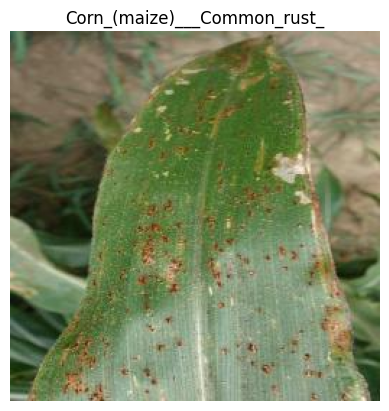

In [7]:
view_random_image(target_dir = '/content/leaf-image-dataset/Plant_images/', target_class = 'Corn_(maize)___Common_rust_')

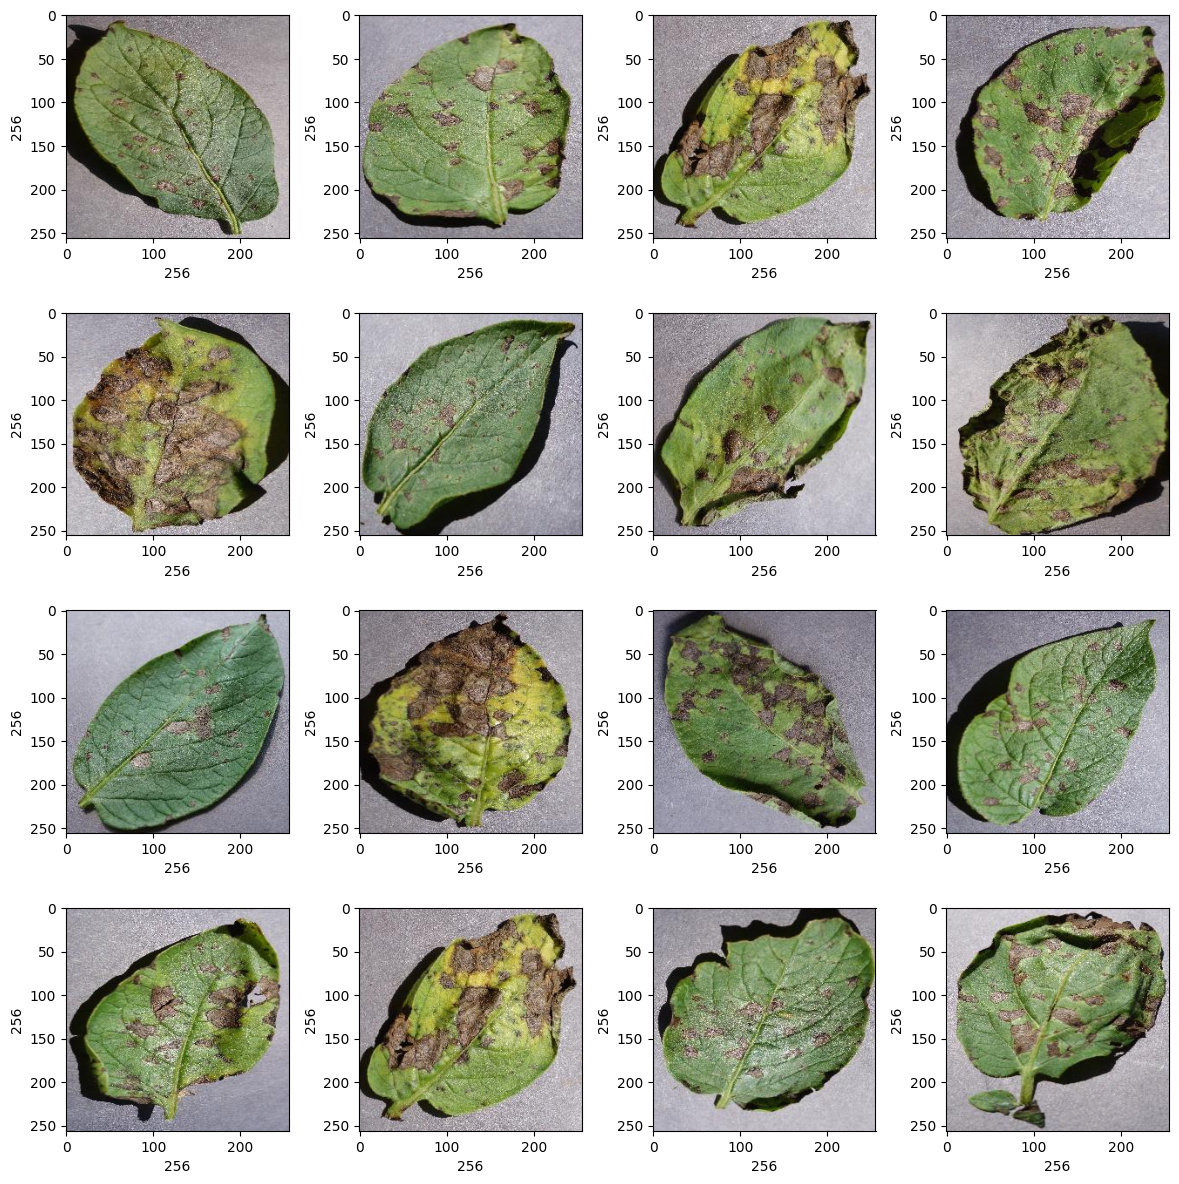

In [8]:
plt.figure(figsize = (12, 12))
path = '/content/leaf-image-dataset/Plant_images/Potato___Early_blight'
for i in range(1, 17):
  plt.subplot(4, 4, i)
  plt.tight_layout()
  rand_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10)
  plt.ylabel(rand_img.shape[0], fontsize = 10)

###**Data Augmentation & Data Loading**

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    rotation_range=20,         # Randomly rotate images by 20 degrees
    width_shift_range=0.2,     # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,    # Randomly shift images vertically by 20% of the height
    shear_range=0.2,           # Shear the image by 20%
    zoom_range=0.2,            # Randomly zoom into images
    horizontal_flip=True,      # Randomly flip images horizontally
    vertical_flip=True,        # Randomly flip images vertically
    validation_split=0.2       # Set aside 20% of the data for validation
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to [0, 1]
    validation_split=0.2       # Same split percentage as training for consistency
)

In [25]:
base_dir = '/content/leaf-image-dataset/Plant_images'

In [26]:
train_data = train_datagen.flow_from_directory(base_dir,
                                              target_size=(224, 224),    # Resize all images to 256x256
                                              batch_size=32,             # Batch size
                                              class_mode='categorical',  # Use 'categorical' for multi-class classification
                                              subset='training',         # Set as training data
                                              seed=42 )

valid_data = validation_datagen.flow_from_directory(base_dir,
                                                    target_size = (224, 224),
                                                    batch_size = 32,
                                                    class_mode = 'categorical',
                                                    subset = 'validation',
                                                    seed = 42)

Found 720 images belonging to 3 classes.
Found 180 images belonging to 3 classes.


###**Model Building**

In [32]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, 3, activation = 'relu', input_shape = (224, 224, 3)),
    layers.MaxPool2D(pool_size = (3, 3)),
    layers.Conv2D(16, 3, activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │         165,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,443 (669.70 KB)

 Trainable params: 171,443 (669.70 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.optimizers import Adam

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(0.0001),
              metrics = ['accuracy'])

In [35]:
history = model.fit(train_data,
                    epochs = 30,
                    validation_data = valid_data)

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 371ms/step - accuracy: 0.3380 - loss: 1.0570 - val_accuracy: 0.5889 - val_loss: 0.8856
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.5655 - loss: 0.9043 - val_accuracy: 0.6333 - val_loss: 0.7735
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.6207 - loss: 0.8025 - val_accuracy: 0.6611 - val_loss: 0.7173
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 277ms/step - accuracy: 0.6708 - loss: 0.7259 - val_accuracy: 0.6667 - val_loss: 0.6867
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 358ms/step - accuracy: 0.6257 - loss: 0.7235 - val_accuracy: 0.6667 - val_loss: 0.6304
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.6583 - loss: 0.6630 - val_accuracy: 0.6500 - val_loss: 0.6224
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.6603 - loss: 0.6304 - val_accuracy: 0.6667 - val_loss: 0.5738
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.6519 - loss: 0.6055 - val_accura

###**Loss & Accuracy Curves**

<Axes: >

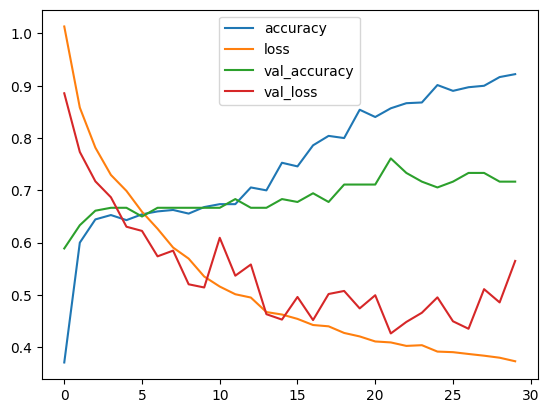

In [37]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [40]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

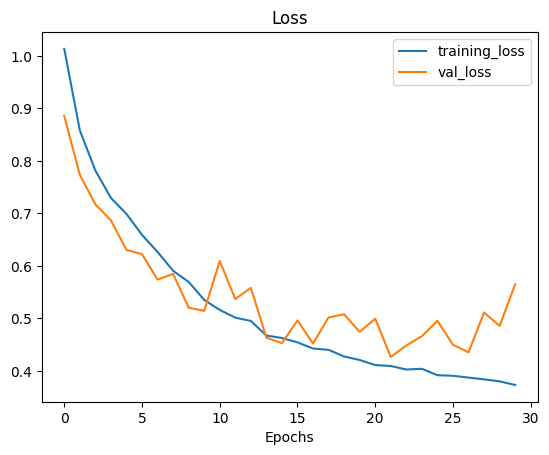

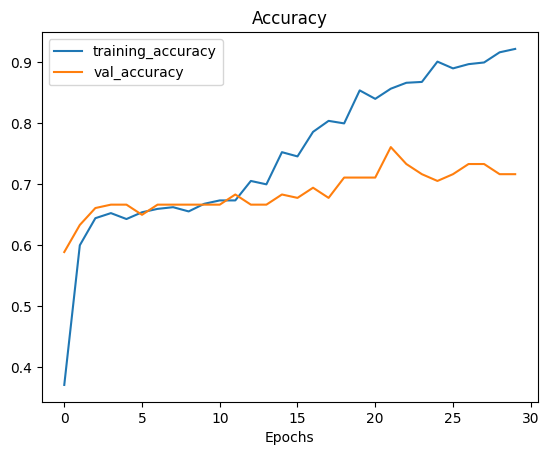

In [41]:
plot_loss_curves(history)

###**Predictions**

In [50]:
from tensorflow.keras.preprocessing import image
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [52]:
load_and_prep_image('/content/leaf-image-dataset/Plant_images/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG', img_shape = 224)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7560424 , 0.75212085, 0.7834934 ],
        [0.7502001 , 0.7462785 , 0.7776511 ],
        [0.73857546, 0.7346539 , 0.76602644],
        ...,
        [0.7074631 , 0.69961995, 0.75060034],
        [0.7068427 , 0.6989996 , 0.74998   ],
        [0.690796  , 0.6829529 , 0.73393327]],

       [[0.74571824, 0.7417967 , 0.7731692 ],
        [0.74535817, 0.7414366 , 0.77280915],
        [0.7414766 , 0.737555  , 0.7689276 ],
        ...,
        [0.7168069 , 0.70896375, 0.75994414],
        [0.7104441 , 0.70260096, 0.75358135],
        [0.6833729 , 0.6755298 , 0.72651017]],

       [[0.7267107 , 0.7227891 , 0.75416166],
        [0.7333934 , 0.7294718 , 0.76084435],
        [0.74217683, 0.73825526, 0.7696278 ],
        ...,
        [0.73423386, 0.7263907 , 0.7773711 ],
        [0.7213284 , 0.71348524, 0.76446563],
        [0.6811518 , 0.6733087 , 0.72428906]],

       ...,

       [[0.7213908 , 0.7174692 , 0.74884176],
        [0.63

In [54]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis = 0))

  if len(pred[0] > 1):
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


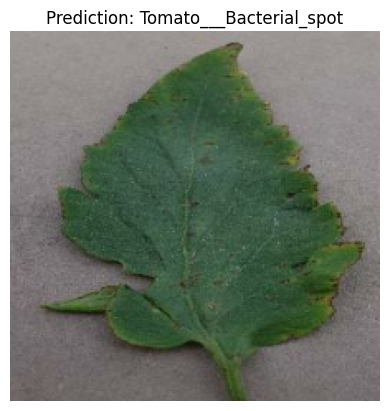

In [59]:
pred_and_plot(model, '/content/leaf-image-dataset/Plant_images/Tomato___Bacterial_spot/e4ea3383-b5fc-45b6-a583-0363f632c3be___GCREC_Bact.Sp 3094.JPG', class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


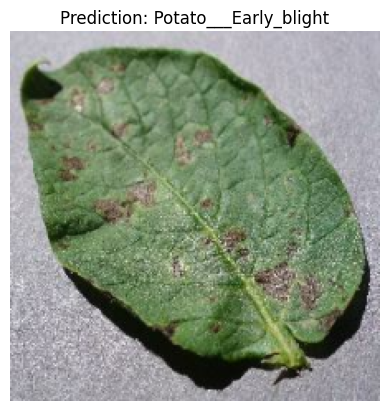

In [64]:
pred_and_plot(model, '/content/leaf-image-dataset/Plant_images/Potato___Early_blight/b475147c-92bc-419a-b2c3-7d5aabbb79ec___RS_Early.B 7379.JPG', class_names)